# MAT201A Final Project Update
## Machine Learning: Which Holmes

Machine Learning, the foundation of countless magical applications that made our lives easier.

Naming a few most common scenarios:

- Spam emails are less likely to appear in our Inbox, that means lower risk of getting malware for less seasoned users, less likely for earldly users like our parents to fall into phishing scams.

- The camera on our smartphones can now take (manipulate, technically speaking) a photo with an amazingly small depth of field (blurred foreground/background) that looks like taken by a professional camera with a fast lens (lens with big aputure). 

- The Photo app on our phones automatically sorted out thousands of photos by recognizing faces, trips, even our pets.

Andrew Ng, professor at Stanford created a series of machines learning and deep learning MOOC courses. I picked up his most famous ML course twice before but was never able to finish. I recently started reading another tutorials on using Google's open source machine learning framework `TensorFlow`. The library is based on `Python` and that tutorials was made into `Jupyter Notebook`. It fits quite well into the MAT201A course.

I plan to make the final project for this course my third time challenging the machine learning, just like what they say `third time's a charm`. 

There are many classical examples in learning ML or Convolutional Neural Network. It is easy to follow the tutorials and call the APIs directly (yes, they made APIs on top of TensorFlow APIs to make it even more friendly to experienced users, which can be more confusing for new users) to realize some interesting application like number classification, style transfer on images.

But the key is about understanding the underlying mechanism. Like the hypothesis, the cost function, the neural network design (a simple example shown below).

`![network_flowchart](media/02_network_flowchart.png)`  
// The Markdown photo insert is not compatible with `*.ipynb` export.  
// Thus the inelegant code insert -

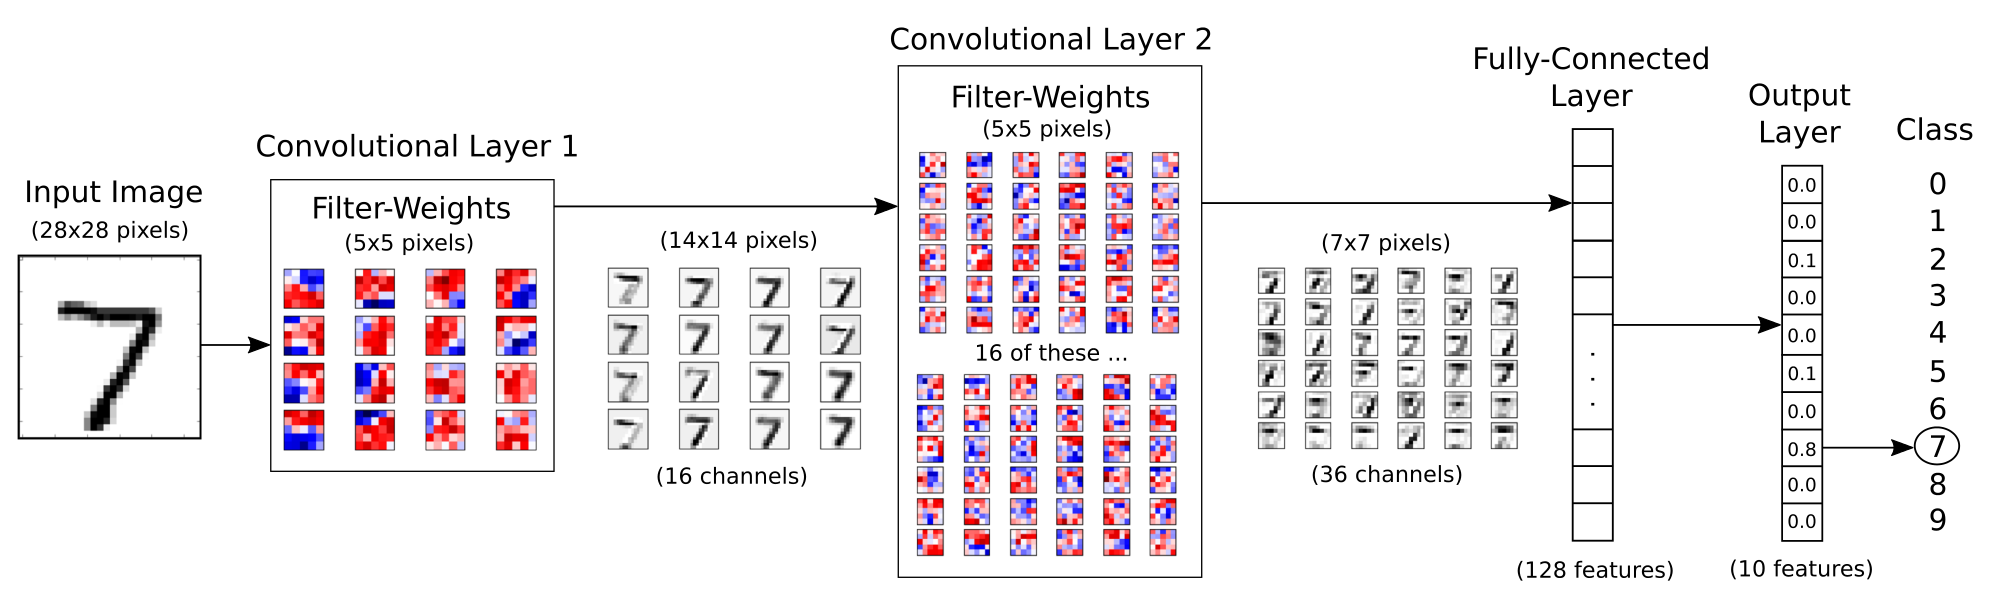

In [22]:
from IPython.display import Image
Image('media/02_network_flowchart.png')

So the plan is to pick up Coursera course [Machine Learning](https://www.coursera.org/browse/data-science/machine-learning) once again and try to consume as much as I can in the in the following weeks. This course reviews the basic linear algebra, linear regression, logistic regression, neural network and the system design, unsupervised learning, and large scale machine learning. The course projects are implemented in `MATLAB` but the fundamental mathematical theories are universal.

The [TensorFlow-Tutorials](https://github.com/Hvass-Labs/TensorFlow-Tutorials) is the other important material that I have tried. Trying these examples reminds me of many basic ideas I learned from Andrew's course. So that I am not simply "calling the functions".

I aim to re-implement one of the TensorFlow examples with my own data-set and present in this notebook. A preliminary idea of the data-set is to use one hundred photos of myself to train a model that recognize if a new photo is me, basically a classification problem. So the data-set should be one hundred jpeg images of my face, size 100 by 100 pixels. If I can find a better way to extract just the face area, I can increase the training set to a much larger number. This [Facial-Recognition-Tool](https://github.com/JeeveshN/Facial-Recognition-Tool) might be a solution.

Linear algebra, matrix manipulation, Python, Jupyter Notebook and convolution are what we learned during this course and will be helpful for the final project.

In [23]:
# Spiderman or ironman or batman
# Rob Lowe and Ian Somerhalder
# Javier Bardem and Jeffrey Dean Morgan

- [x] Create a new notebook titled "MAT201A Final Project Proposal". 
- [x] Using markdown cells to format your prose and code cells to load and process images and data, draft a final project proposal for this course; 
- [x] Include (scanned) diagrams/sketches, **a title**, 
- [x] and links to similar (or inspirational) work.
- [ ] Load and present your data in this notebook. 
- [x] Clearly describe your dataset including media, size, structure, physical units, independent variable (time, space, etc.) and any other important information. 
- [x] Choosing some process, algorithm, or technique introduced or discussed in this class. 
- [x] What will you do with your data and why?

### Load and present your data in this notebook

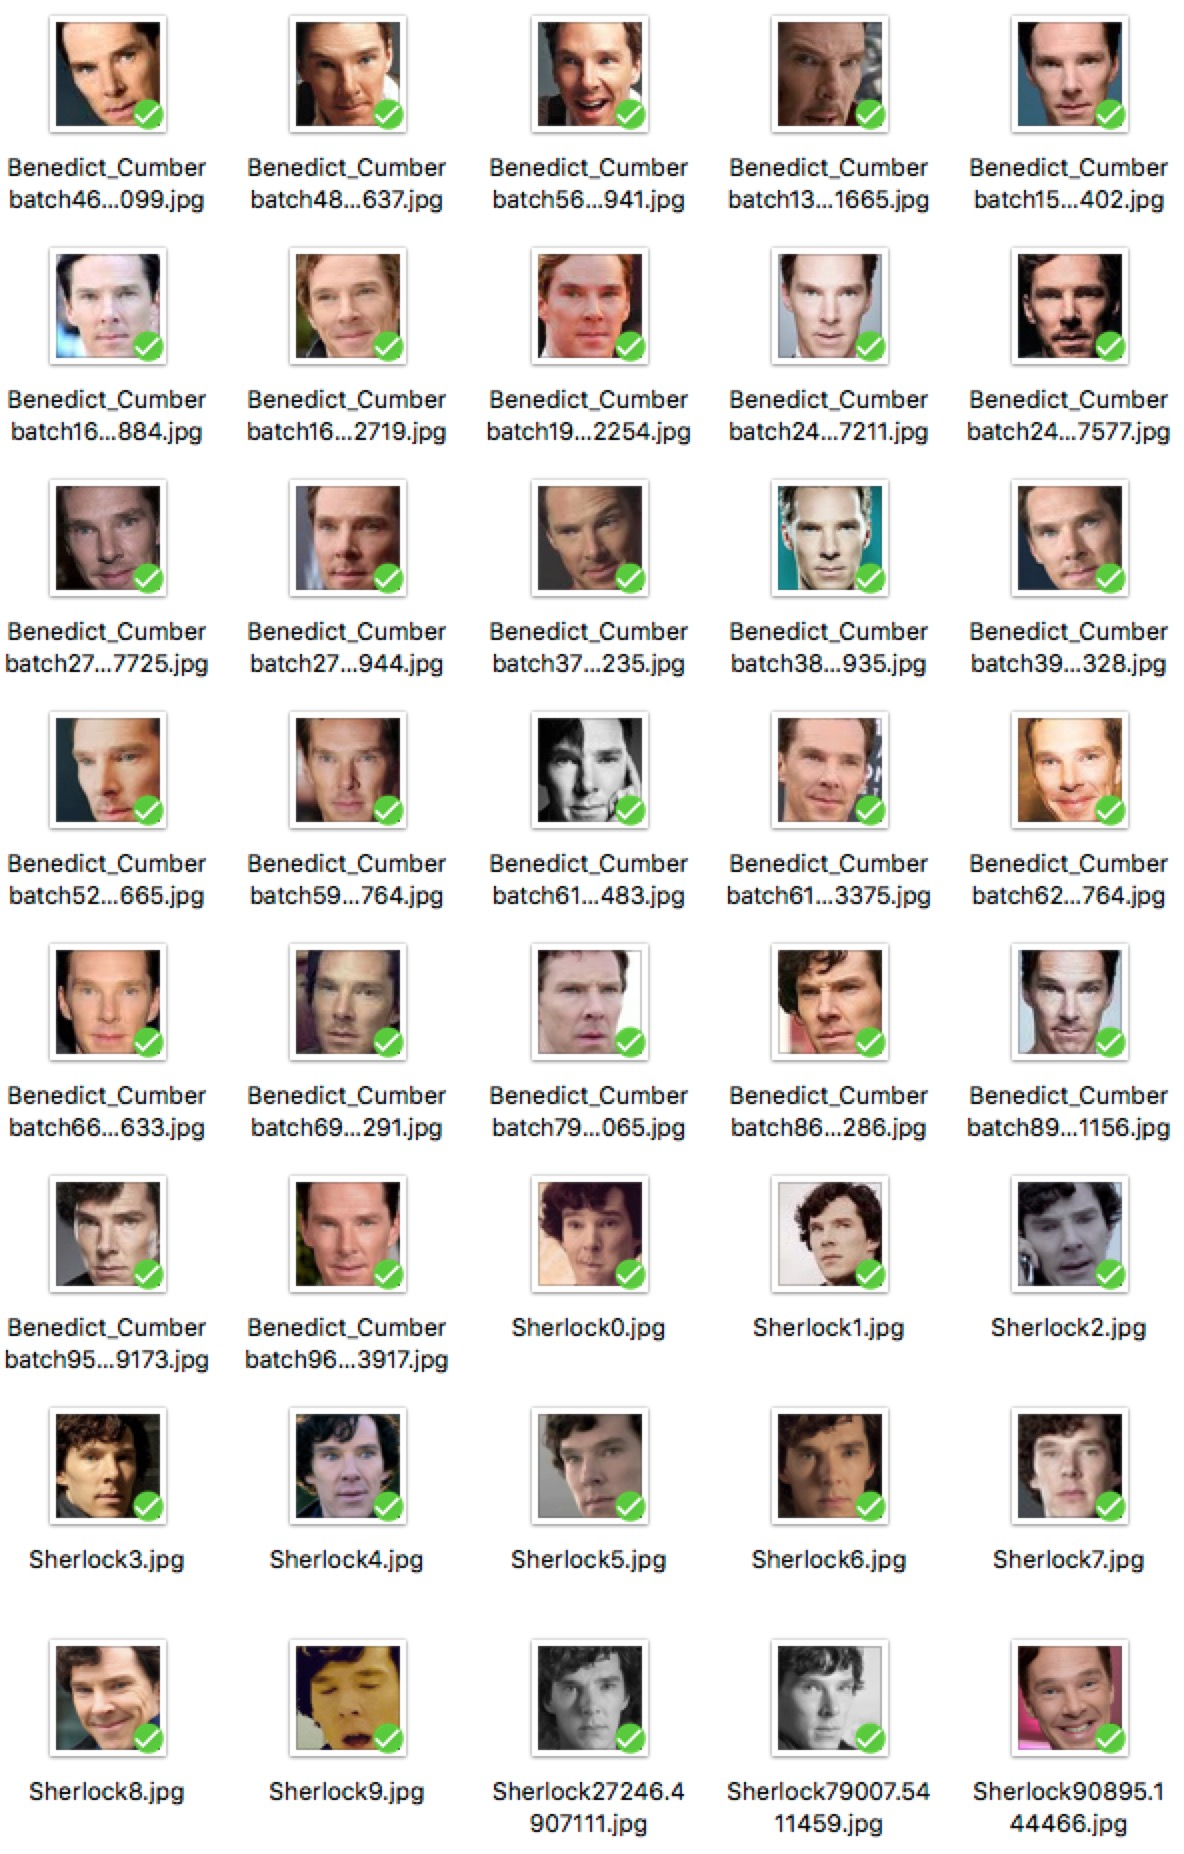

In [24]:
Image('media/dataset_thumb1.jpeg')

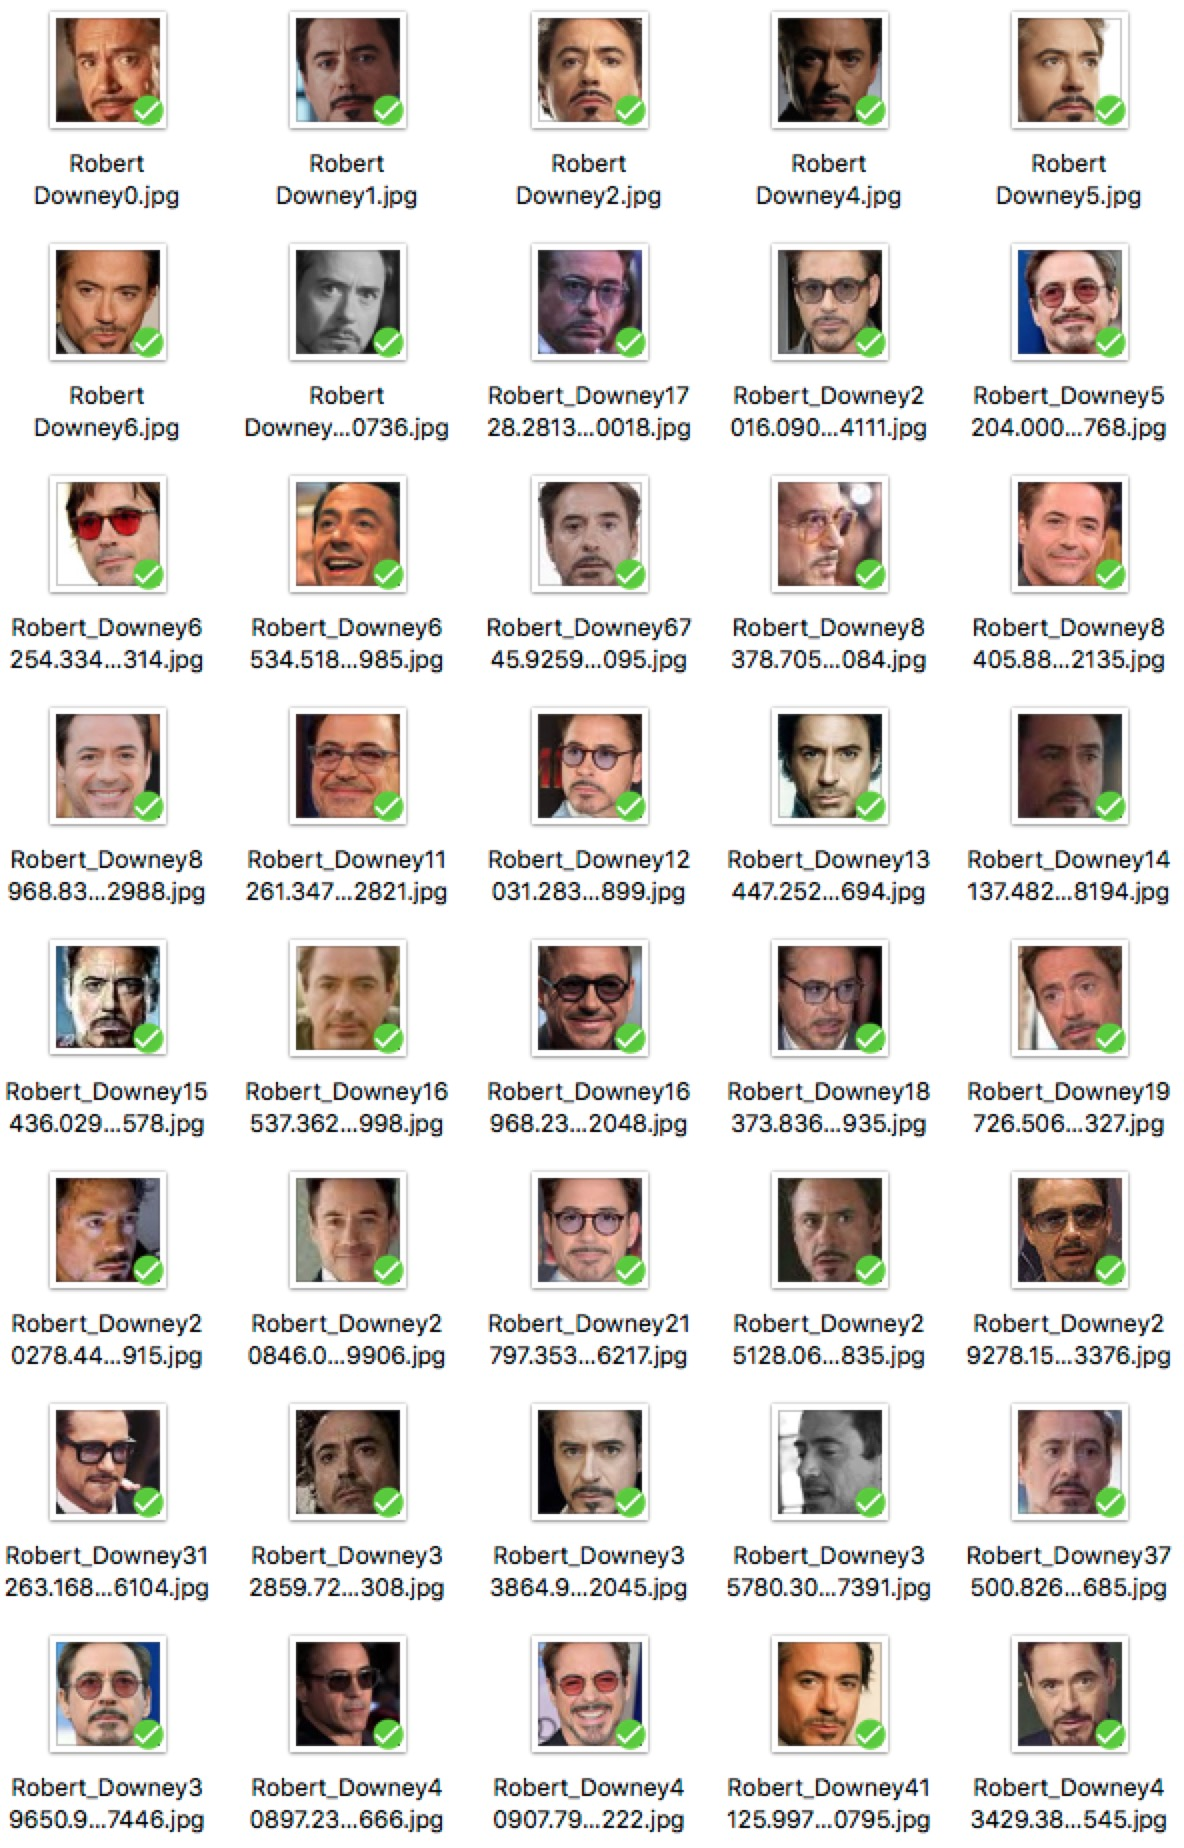

In [25]:
Image('media/dataset_thumb2.jpeg')

### Implementation

In [26]:
# dataset pre-processing

import os, cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split

import keras # keras 2
from keras import backend as K
K.set_image_dim_ordering('tf')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, adam

def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

In [27]:
# define dataset

height = 80
width = 80
num_channel = 1

# import and pre-processing
img_dataset_list = []
dataset_dir = "./dataset"
dataset_list = listdir_nohidden(dataset_dir)

for dataset in dataset_list:
    print('\nLoading images of dataset - ' + dataset + '\n')
    img_list = listdir_nohidden(dataset_dir + '/' + dataset)
    count = 0
    for img in img_list:
        input_img = cv2.imread(dataset_dir + '/' + dataset + '/' + img)
        input_img = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)
        input_img = cv2.resize(input_img,(height, width))
        img_dataset_list.append(input_img)
        print('Loaded image - ' + img)
        count += 1
    print("\n", count, dataset, "samples in total")
        
        # shows max value of each img
        #print(np.array(input_img).flat[np.argmax(np.array(input_img))])
        # plt.imshow(input_img, cmap="gray")
        # plt.imsave('./80*80_'+img, input_img, format="jpg", cmap="gray")
        # cv2.imwrite(CV_IMWRITE_JPEG_QUALITY=100)


img_dataset = np.array(img_dataset_list)
img_dataset = img_dataset.astype('float32')
img_dataset /= 255
# make sure it's normalized
print("\nmax value =", img_dataset.flat[np.argmax(img_dataset)]) 
print(img_dataset.shape)

# expand dimension
if num_channel == 1:
    img_dataset = np.expand_dims(img_dataset, axis=4)
    print(img_dataset.shape)


Loading images of dataset - BC

Loaded image - Benedict_Cumberbatch13055.3887891665.jpg
Loaded image - Benedict_Cumberbatch15340.527831894402.jpg
Loaded image - Benedict_Cumberbatch16912.56084672719.jpg
Loaded image - Benedict_Cumberbatch19268.027259362254.jpg
Loaded image - Benedict_Cumberbatch24162.80566507211.jpg
Loaded image - Benedict_Cumberbatch24212.004575417577.jpg
Loaded image - Benedict_Cumberbatch27491.048486887725.jpg
Loaded image - Benedict_Cumberbatch27669.04088830944.jpg
Loaded image - Benedict_Cumberbatch37122.9200660235.jpg
Loaded image - Benedict_Cumberbatch38352.51342519935.jpg
Loaded image - Benedict_Cumberbatch39358.31233505328.jpg
Loaded image - Benedict_Cumberbatch46.35737246118099.jpg
Loaded image - Benedict_Cumberbatch4845.122615575637.jpg
Loaded image - Benedict_Cumberbatch52948.273293338665.jpg
Loaded image - Benedict_Cumberbatch5613.587713755941.jpg
Loaded image - Benedict_Cumberbatch59348.16414453764.jpg
Loaded image - Benedict_Cumberbatch61904.99436012337

In [28]:
# assign labels
num_classes = 2

num_samples = img_dataset.shape[0]
labels = np.ones((num_samples,),dtype='int64')

labels[0:37] = 0
labels[38:135] = 1

names = ['Benedict Cumberbatch','Robert Downey Jr']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

In [29]:
# shuffle and split training, testing dataset
x, y = shuffle(img_dataset, Y, random_state = 2)
print(x.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(136, 80, 80, 1) (136, 2)
(108, 80, 80, 1) (28, 80, 80, 1) (108, 2) (28, 2)


In [30]:
# build the network
input_shape = img_dataset[0].shape

model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(pool_size = (2,2)))
# model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
# training stage
num_epoch = 20
hist = model.fit(X_train, y_train, batch_size=32, nb_epoch=num_epoch, verbose=1, validation_data=(X_test,y_test))

# hist = model.fit(X_train, y_train, batch_size=32, nb_epoch=20, verbose=1, validation_split=0.1)

/anaconda3/envs/tf/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 108 samples, validate on 28 samples
Epoch 1/20
108/108 [==============================] - 1s 7ms/step - loss: 1.8405 - acc: 0.4815 - val_loss: 0.6380 - val_acc: 0.6786
Epoch 2/20
108/108 [==============================] - 1s 6ms/step - loss: 0.6658 - acc: 0.6296 - val_loss: 0.6314 - val_acc: 0.6786
Epoch 3/20
108/108 [==============================] - 1s 6ms/step - loss: 0.5680 - acc: 0.7593 - val_loss: 0.7143 - val_acc: 0.6786
Epoch 4/20
108/108 [==============================] - 1s 6ms/step - loss: 0.5083 - acc: 0.7500 - val_loss: 0.5168 - val_acc: 0.6786
Epoch 5/20
108/108 [==============================] - 1s 6ms/step - loss: 0.5054 - acc: 0.7407 - val_loss: 0.5586 - val_acc: 0.6786
Epoch 6/20
108/108 [==============================] - 1s 6ms/step - loss: 0.3566 - acc: 0.8519 - val_loss: 0.5103 - val_acc: 0.6786
Epoch 7/20
108/108 [==============================] - 1s 6ms/step - loss: 0.2642 - acc: 0.8889 - val_loss: 0.7397 - val_acc: 0.6786
Epoch 8/20
108/108 [===========

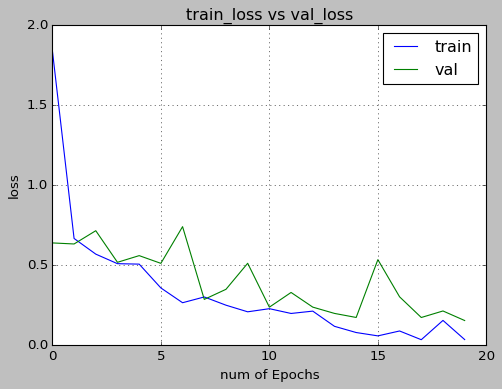

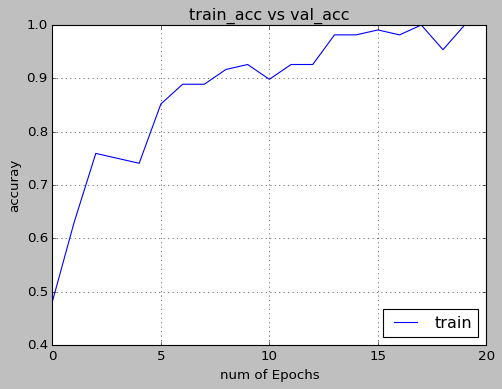

In [32]:
# visualizing losses and accuracy

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['acc']
xc=range(num_epoch)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc, train_acc)
# plt.plot(xc, val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuray')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])


In [36]:
# score = model.evaluate(X_test, y_test, show_accuracy=True, verbose=0)
score = model.evaluate(X_test, y_test, batch_size=10)

print('\n'+'Test Loss:', score[0])
print('Test accurary:', score[1],'\n')

def whichHolmes(test_image):
    print(test_image.shape)
#     print(y_test[0:1])
    prediction = model.predict(test_image)
#     print(prediction[:,0])
    result = model.predict_classes(test_image)
    for i in result:
        if i == 0:
            print("it's Cumberbatch holmes!")
        else:
            print("it's Downey Jr holmes!")

#     show_test = test_image.flatten()
#     show_test = show_test.reshape([80,80])
#     print(show_test.shape)
#     plt.imsave(result, show_test, format="jpg", cmap="gray")
    
test_image = X_test
whichHolmes(test_image)

# cv2.imshow(test_image, cmap="gray")

28/28 [==============================] - 0s 2ms/step

Test Loss: 0.152934825314
Test accurary: 0.928571420056 

(28, 80, 80, 1)
it's Downey Jr holmes!
it's Cumberbatch holmes!
it's Cumberbatch holmes!
it's Cumberbatch holmes!
it's Downey Jr holmes!
it's Downey Jr holmes!
it's Downey Jr holmes!
it's Downey Jr holmes!
it's Downey Jr holmes!
it's Downey Jr holmes!
it's Downey Jr holmes!
it's Cumberbatch holmes!
it's Downey Jr holmes!
it's Downey Jr holmes!
it's Cumberbatch holmes!
it's Cumberbatch holmes!
it's Downey Jr holmes!
it's Cumberbatch holmes!
it's Downey Jr holmes!
it's Downey Jr holmes!
it's Cumberbatch holmes!
it's Cumberbatch holmes!
it's Cumberbatch holmes!
it's Downey Jr holmes!
it's Downey Jr holmes!
it's Cumberbatch holmes!
it's Downey Jr holmes!
it's Downey Jr holmes!


### test new images

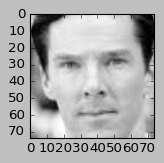

(1, 80, 80, 1)
it's Cumberbatch holmes!




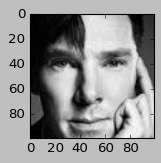

(1, 80, 80, 1)
it's Cumberbatch holmes!




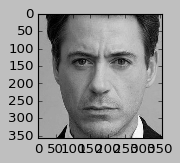

(1, 80, 80, 1)
it's Downey Jr holmes!




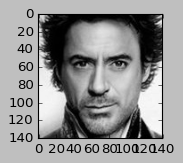

(1, 80, 80, 1)
it's Downey Jr holmes!




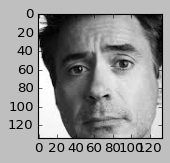

(1, 80, 80, 1)
it's Downey Jr holmes!




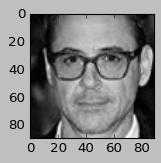

(1, 80, 80, 1)
it's Downey Jr holmes!




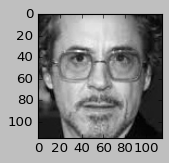

(1, 80, 80, 1)
it's Downey Jr holmes!




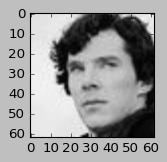

(1, 80, 80, 1)
it's Cumberbatch holmes!





In [37]:
# new image pre-process

# new_image = cv2.imread('./test/')

test_dir = "./test"
test_list = listdir_nohidden(test_dir)

for img in test_list:
    new_image = cv2.imread(test_dir + '/' + img,0)
    show_img = new_image
#     new_image = cv2.cvtColor(new_image, cv2.COLOR_RGB2GRAY)
    new_image = cv2.resize(new_image,(height, width))
    new_image = np.array(new_image)
    new_image = new_image.astype('float32')
    new_image /= 255
    
    # expand dimensions
    new_image = np.expand_dims(new_image, axis=0)
    new_image = np.expand_dims(new_image, axis=3)
#     print('Loaded ' + img)

    # show image
    plt.rcParams['figure.figsize'] = [2, 2]
    plt.imshow(show_img,cmap='gray')
    plt.show()


    
#     print(model.predict(new_image))
#     print(model.predict_classes(test_image))
    whichHolmes(new_image)
    print('\n')

    

print()

### save the trained model

In [41]:
# from keras.models import model_from_json
# from keras.models import load_model

# # serialize model to json
# model_json = model.to_json()
# with open("model_json", "w") as json_file:
#     json_file.write(model_json)

# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("saved model to disk")

# # later...
# # load json and creat model
# json_file = open('model_json','r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights('model.h5')
# print("loaded model from disk")

# second methdo
model.save('model.hdf5')
loaded_model = load_model('model.hdf5')